       cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count       8124        8124      8124    8124  8124            8124   
unique         6           4        10       2     9               2   
top            x           y         n       f     n               f   
freq        3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape  ...  \
count          8124      8124       8124        8124  ...   
unique            2         2         12           2  ...   
top               c         b          b           t  ...   
freq           6812      5612       1728        4608  ...   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     

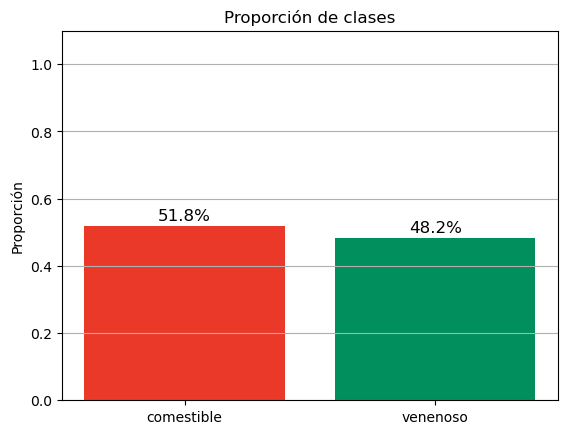

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from math import sqrt, ceil

# Módulos de ML
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# Regresión logística
from sklearn.linear_model import LogisticRegression
# Árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Máquinas de vectores de soporte (SVM)
from sklearn.svm import SVC
# Random Forest
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from ucimlrepo import fetch_ucirepo

data = fetch_ucirepo(id =73)
X = data.data.features 
y = data.data.targets 

df = pd.DataFrame(X, columns=data.data.feature_names)
df['target'] = y
df

print(df.describe())


import matplotlib.pyplot as plt
label_map = {'p': 'venenoso', 'e': 'comestible'}
df_labels = df['target'].map(label_map)

# Calcular proporciones
counts = df_labels.value_counts()
proportions = counts / counts.sum()

# Crear gráfico
fig, ax = plt.subplots()
bars = ax.bar(proportions.index, proportions.values, color=['#EA3829', '#008F5D'])

# Agregar porcentajes sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontsize=12)

# Estética
ax.set_title('Proporción de clases')
ax.set_ylabel('Proporción')
plt.grid(axis='y')
plt.ylim(0, 1.1)
plt.show()

df.info()